In [1]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from collections import Counter

# loading linear algorithms
from sklearn.linear_model import LogisticRegression

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

In [2]:
# pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
#read in CSV
df = pd.read_csv('Imputed_Data.csv')
df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1176 non-null   int64  
 1   group                     1176 non-null   int64  
 2   ID                        1176 non-null   int64  
 3   outcome                   1176 non-null   float64
 4   age                       1176 non-null   int64  
 5   gendera                   1176 non-null   int64  
 6   BMI                       1176 non-null   float64
 7   hypertensive              1176 non-null   int64  
 8   atrialfibrillation        1176 non-null   int64  
 9   CHD with no MI            1176 non-null   int64  
 10  diabetes                  1176 non-null   int64  
 11  deficiencyanemias         1176 non-null   int64  
 12  depression                1176 non-null   int64  
 13  Hyperlipemia              1176 non-null   int64  
 14  Renal fa

In [5]:
df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'group', 'ID', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD'],  axis=1, inplace=True)
df.head()

,outcome,age,gendera,BMI,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0.0,72,1,37.588179,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,0.0,75,2,30.188278,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,0.0,83,2,26.572634,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,0.0,43,2,83.264629,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,0.0,75,2,31.824842,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [7]:
df_sub = df[['outcome', 'Anion gap', 'Lactic acid', 'Bicarbonate', 'Leucocyte', 'Blood calcium', 'Urea nitrogen', 'Urine output', 'Chloride', 'PH', 'Blood sodium', 'Lymphocyte', 'temperature', 'heart rate', 'Platelets', 'SP O2']].copy()

In [8]:
# Create our features
X = df_sub.drop('outcome', axis=1)
y = df_sub['outcome']

In [9]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    
    print(conf_matrix_test)

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    print()
    
    # Calculate the accuracy score
    y_pred_model = model.predict(X_test)
    accuracy_score_model = accuracy_score(y_test, y_pred_model)
    
    print(f"Accuracy score: {accuracy_score_model}")
    
    print()
    
    # Creates the Roc Curve
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

In [10]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train_old, X_test, y_train_old, y_test = train_test_split(X, y, stratify=y, random_state=42)

print(len(X_train_old) / len(X))
print(len(X_test) / len(X))

0.75
0.25


In [11]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train_old, y_train_old)

Counter(y_train)

Counter({1.0: 763, 0.0: 763})

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       763
         1.0       0.74      0.69      0.71       763

    accuracy                           0.72      1526
   macro avg       0.72      0.72      0.72      1526
weighted avg       0.72      0.72      0.72      1526

[[575 188]
 [239 524]]
root mean squared error (RMSE): 0.5289768556009496
R-squared (R2 ): -0.11926605504587151
MAE 0.2798165137614679

Testing SET
              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86       254
         1.0       0.33      0.68      0.45        40

    accuracy                           0.77       294
   macro avg       0.64      0.73      0.65       294
weighted avg       0.86      0.77      0.80       294

[[200  54]
 [ 13  27]]
root mean squared error (RMSE): 0.4773794679943672
R-squared (R2 ): -0.9387795275590551
MAE 0.22789115646258504

Accuracy score: 0.7721088435374149



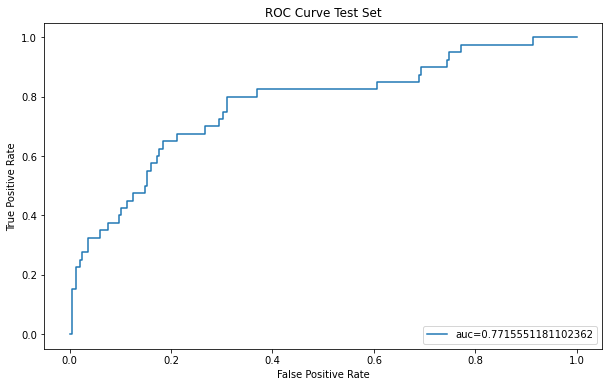

In [13]:
# Logistic Regression
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [14]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

          Feature  Importance
3       Leucocyte    0.468228
5   Urea nitrogen    0.468065
1     Lactic acid    0.366792
12     heart rate    0.207432
9    Blood sodium    0.039027
11    temperature   -0.057755
8              PH   -0.064951
0       Anion gap   -0.065659
7        Chloride   -0.067801
10     Lymphocyte   -0.082461
13      Platelets   -0.279984
6    Urine output   -0.386650
2     Bicarbonate   -0.415946
14          SP O2   -0.441255
4   Blood calcium   -0.466547


TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       254
         1.0       0.25      0.23      0.24        40

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.79      0.80      0.80       294

[[227  27]
 [ 31   9]]
root mean squared error (RMSE): 0.44416090728994356
R-squared (R2 ): -0.6783464566929134
MAE 0.19727891156462585

Accuracy score: 0.8027210884353742



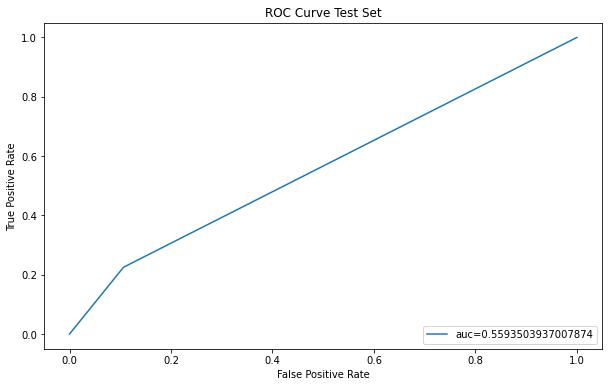

In [15]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       254
         1.0       0.75      0.30      0.43        40

    accuracy                           0.89       294
   macro avg       0.82      0.64      0.68       294
weighted avg       0.88      0.89      0.87       294

[[250   4]
 [ 28  12]]
root mean squared error (RMSE): 0.329914439536929
R-squared (R2 ): 0.07401574803149613
MAE 0.10884353741496598

Accuracy score: 0.891156462585034



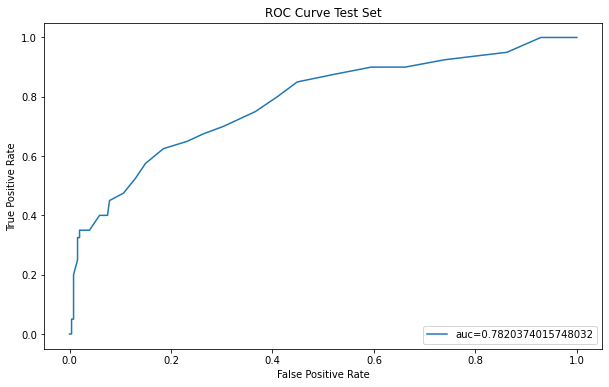

In [16]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

In [17]:
# List the features sorted in descending order by feature importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.1028331709999963, 'Bicarbonate'),
 (0.10049907735079178, 'Urine output'),
 (0.08288004094304562, 'Leucocyte'),
 (0.08030204737553734, 'Anion gap'),
 (0.07476551263125028, 'Urea nitrogen'),
 (0.07459080355508943, 'Blood calcium'),
 (0.0668203797744788, 'Blood sodium'),
 (0.05831756158581265, 'Lymphocyte'),
 (0.058008610414848914, 'PH'),
 (0.056852770732290954, 'SP O2'),
 (0.0541908124572408, 'Chloride'),
 (0.05288354973013702, 'heart rate'),
 (0.046737658935822365, 'Platelets'),
 (0.04543353458240335, 'Lactic acid'),
 (0.044884468931254196, 'temperature')]

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       254
         1.0       0.80      0.10      0.18        40

    accuracy                           0.87       294
   macro avg       0.84      0.55      0.55       294
weighted avg       0.87      0.87      0.83       294

[[253   1]
 [ 36   4]]
root mean squared error (RMSE): 0.35475391489884145
R-squared (R2 ): -0.07066929133858268
MAE 0.12585034013605442

Accuracy score: 0.8741496598639455



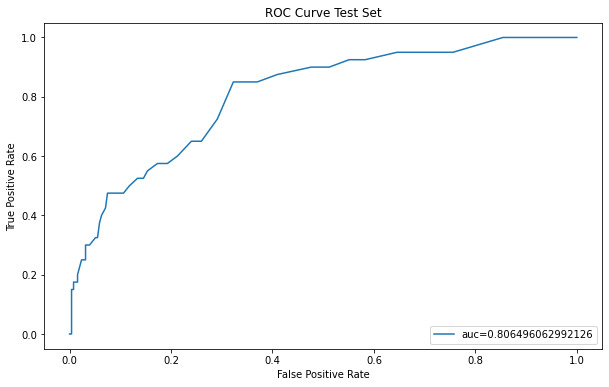

In [18]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       763
         1.0       0.88      0.90      0.89       763

    accuracy                           0.89      1526
   macro avg       0.89      0.89      0.89      1526
weighted avg       0.89      0.89      0.89      1526

[[670  93]
 [ 80 683]]
root mean squared error (RMSE): 0.3367020687388982
R-squared (R2 ): 0.546526867627785
MAE 0.11336828309305373

Testing SET
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       254
         1.0       0.33      0.45      0.38        40

    accuracy                           0.80       294
   macro avg       0.62      0.65      0.63       294
weighted avg       0.83      0.80      0.81       294

[[217  37]
 [ 22  18]]
root mean squared error (RMSE): 0.4479735171958757
R-squared (R2 ): -0.707283464566929
MAE 0.20068027210884354

Accuracy score: 0.7993197278911565



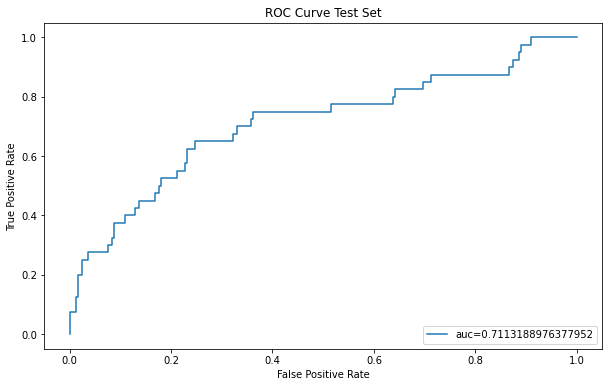

In [19]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       763
         1.0       0.97      0.99      0.98       763

    accuracy                           0.98      1526
   macro avg       0.98      0.98      0.98      1526
weighted avg       0.98      0.98      0.98      1526

[[742  21]
 [  6 757]]
root mean squared error (RMSE): 0.13301622404223282
R-squared (R2 ): 0.9292267365661862
MAE 0.017693315858453473

Testing SET
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       254
         1.0       0.44      0.45      0.44        40

    accuracy                           0.85       294
   macro avg       0.68      0.68      0.68       294
weighted avg       0.85      0.85      0.85       294

[[231  23]
 [ 22  18]]
root mean squared error (RMSE): 0.3912303982179758
R-squared (R2 ): -0.30216535433070857
MAE 0.15306122448979592

Accuracy score: 0.8469387755102041



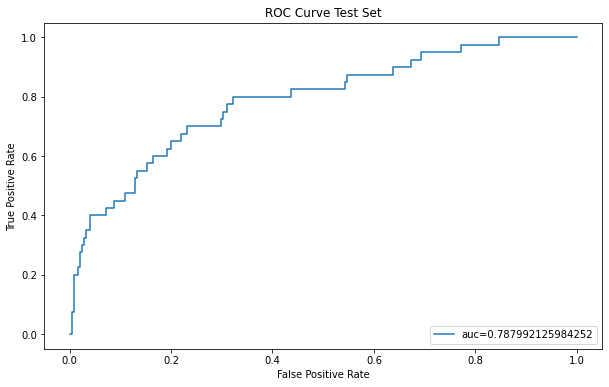

In [20]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       254
         1.0       0.60      0.30      0.40        40

    accuracy                           0.88       294
   macro avg       0.75      0.63      0.67       294
weighted avg       0.86      0.88      0.86       294

[[246   8]
 [ 28  12]]
root mean squared error (RMSE): 0.3499271061118826
R-squared (R2 ): -0.04173228346456681
MAE 0.12244897959183673

Accuracy score: 0.8775510204081632



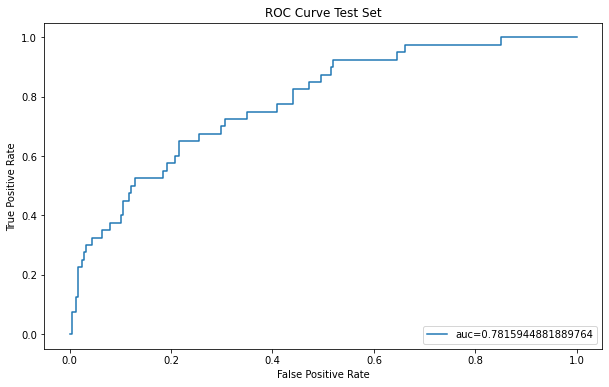

In [21]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       763
         1.0       1.00      1.00      1.00       763

    accuracy                           1.00      1526
   macro avg       1.00      1.00      1.00      1526
weighted avg       1.00      1.00      1.00      1526

[[763   0]
 [  0 763]]
root mean squared error (RMSE): 0.0
R-squared (R2 ): 1.0
MAE 0.0

Testing SET
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       254
         1.0       0.58      0.28      0.37        40

    accuracy                           0.87       294
   macro avg       0.74      0.62      0.65       294
weighted avg       0.85      0.87      0.85       294

[[246   8]
 [ 29  11]]
root mean squared error (RMSE): 0.35475391489884145
R-squared (R2 ): -0.07066929133858268
MAE 0.12585034013605442

Accuracy score: 0.8741496598639455



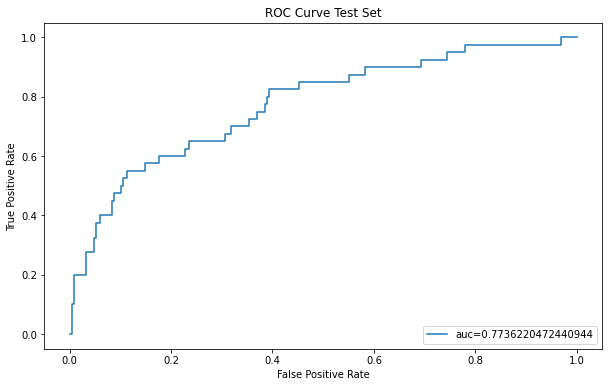

In [22]:
lgbm = LGBMClassifier(random_state=42)
lgbm = evaluateModel(lgbm, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       763
         1.0       0.89      0.95      0.92       763

    accuracy                           0.91      1526
   macro avg       0.92      0.91      0.91      1526
weighted avg       0.92      0.91      0.91      1526

[[673  90]
 [ 40 723]]
root mean squared error (RMSE): 0.2918733275215118
R-squared (R2 ): 0.6592398427260813
MAE 0.08519003931847968

Testing SET
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88       254
         1.0       0.34      0.50      0.41        40

    accuracy                           0.80       294
   macro avg       0.63      0.68      0.64       294
weighted avg       0.84      0.80      0.82       294

[[216  38]
 [ 20  20]]
root mean squared error (RMSE): 0.44416090728994356
R-squared (R2 ): -0.6783464566929134
MAE 0.19727891156462585

Accuracy score: 0.8027210884353742



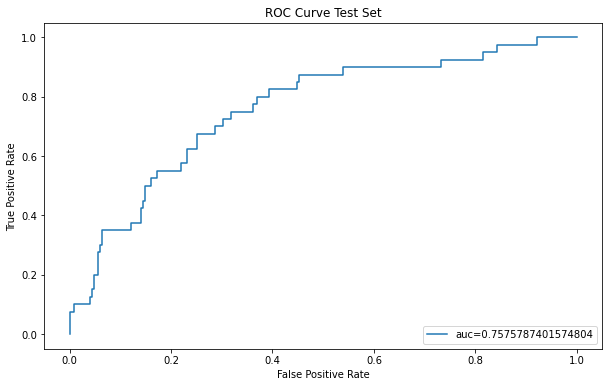

In [23]:
clf = svm.SVC(probability=True)
clf = evaluateModel(clf, X_train, y_train, X_test, y_test)

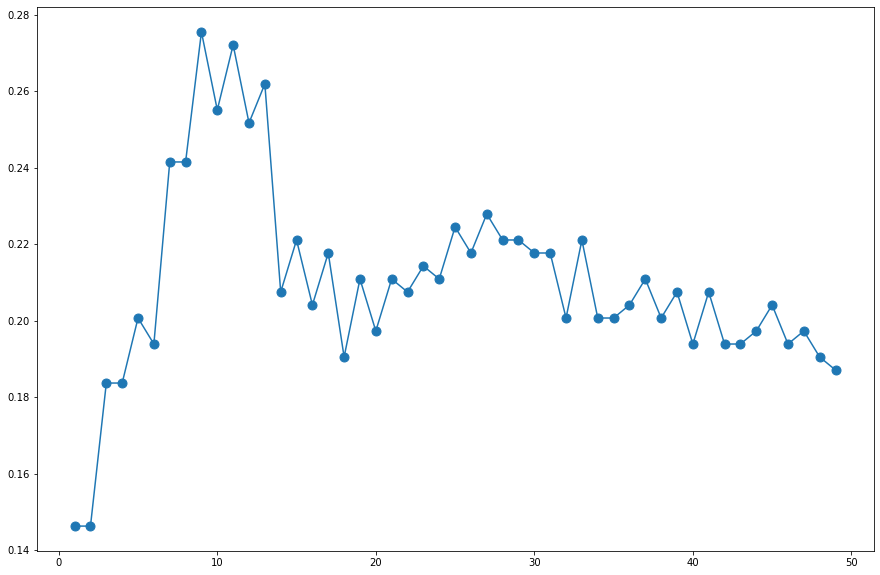

In [24]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

TRAINING SET
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       763
         1.0       0.93      1.00      0.96       763

    accuracy                           0.96      1526
   macro avg       0.96      0.96      0.96      1526
weighted avg       0.96      0.96      0.96      1526

[[703  60]
 [  1 762]]
root mean squared error (RMSE): 0.19993445846129101
R-squared (R2 ): 0.8401048492791612
MAE 0.0399737876802097

Testing SET
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       254
         1.0       0.36      0.45      0.40        40

    accuracy                           0.82       294
   macro avg       0.63      0.66      0.65       294
weighted avg       0.84      0.82      0.82       294

[[222  32]
 [ 22  18]]
root mean squared error (RMSE): 0.4285714285714286
R-squared (R2 ): -0.5625984251968503
MAE 0.1836734693877551

Accuracy score: 0.8163265306122449



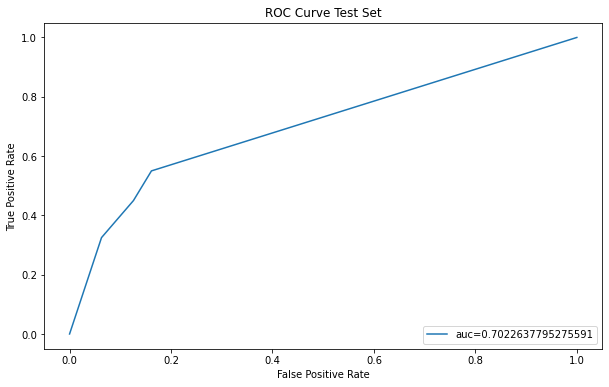

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)